# **Configuration**

In [1]:
!apt-get install -y pciutils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpci3 pci.ids
The following NEW packages will be installed:
  libpci3 pci.ids pciutils
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 343 kB of archives.
After this operation, 1,581 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pci.ids all 0.0~2022.01.22-1 [251 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libpci3 amd64 1:3.7.0-6 [28.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 pciutils amd64 1:3.7.0-6 [63.6 kB]
Fetched 343 kB in 1s (280 kB/s)
Selecting previously unselected package pci.ids.
(Reading database ... 123634 files and directories currently installed.)
Preparing to unpack .../pci.ids_0.0~2022.01.22-1_all.deb ...
Unpacking pci.ids (0.0~2022.01.22-1) ...
Selecting previously unselected package libpci3:amd64.
Prepari

In [2]:
!curl https://ollama.ai/install.sh | sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 13269    0 13269    0     0  63878      0 --:--:-- --:--:-- --:--:-- 64101
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> NVIDIA GPU installed.
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [27]:
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 562 (delta 185), reused 145 (delta 100), pack-reused 269 (from 1)
Receiving objects: 100% (562/562), 181.33 KiB | 977.00 KiB/s, done.
Resolving deltas: 100% (287/287), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.4 MB/s eta 0:00:00
Installing RAPIDS remaining 24.10.* libraries
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.7/567.7 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 101.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.5/915.5 kB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [28]:
cd /content/drive/MyDrive/LLMs/Analisys-ElasticSearch

/content/drive/MyDrive/LLMs/Analisys-ElasticSearch


In [29]:
ls

matriz.pkl  Ollama-ElasticSearch.ipynb  rapidsai-csp-utils/  UMAP-Turing.ipynb  UMAP_Turing.ipynb


# **Embedding**

In [30]:
import os, pickle, threading, subprocess, requests, json
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from cuml.manifold.umap import UMAP


In [4]:
def ollama():
    os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'
    os.environ['OLLAMA_ORIGINS'] = '*'
    subprocess.Popen(["ollama", "serve"])

ollama_thread = threading.Thread(target=ollama)
ollama_thread.start()

In [5]:
!ollama pull mxbai-embed-large

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling 819c2adf5ce6...   0% ▕▏    0 B/669 MB                  pulling manifest 
pulling 819c2adf5ce6...   0% ▕▏    0 B/669 MB                  pulling manifest 
pulling 819c2adf5ce6...   0% ▕▏ 356 KB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...   6% ▕▏  37 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...   9% ▕▏  59 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...  15% ▕▏  98 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...  19% ▕▏ 127 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...  21% ▕▏ 138 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...  24% ▕▏ 163 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...  29% ▕▏ 193 MB/669 MB                  pulling manifest 
pulling 819c2adf5ce6...  31% ▕▏ 204 MB/669 MB             

In [20]:
text = "lkhlkhjlkjhoiyu466592834yhfjklhasdlfhy8whgjklfvhioe43ty@#q"

headers = {"Content-Type": "application/json"}
data = {"model": "mxbai-embed-large", "prompt": text}

response = requests.post("http://localhost:11434/api/embeddings", headers=headers, json=data)

response

<Response [200]>

In [21]:
embedding = response.json().get("embedding")

type(embedding), len(embedding)

(list, 1024)

In [25]:
arr = np.array(embedding, dtype='float32')
arr

array([ 0.3121967 ,  0.00856536,  0.26977128, ..., -0.75170636,
       -0.05929572,  0.06226557], dtype=float32)

# **Explatory analysis**

In [31]:
with open("matriz.pkl", "rb") as f:
    matriz = pickle.load(f)

## KPCA

In [33]:
num_samples = 1000
random_indices = np.random.choice(matriz.shape[0], size=num_samples, replace=False)
subset = matriz[random_indices]

In [34]:
scaler = StandardScaler()
subset_scaled = scaler.fit_transform(subset)

kpca = KernelPCA(n_components=2, kernel='rbf')
subset_transformed = kpca.fit_transform(subset_scaled)

In [35]:
matriz_scaled = scaler.transform(matriz)
matriz_transformed = kpca.transform(matriz_scaled)

In [40]:
arr_scaled = scaler.transform(arr.reshape(1, -1))
arr_transformed = kpca.transform(arr_scaled)

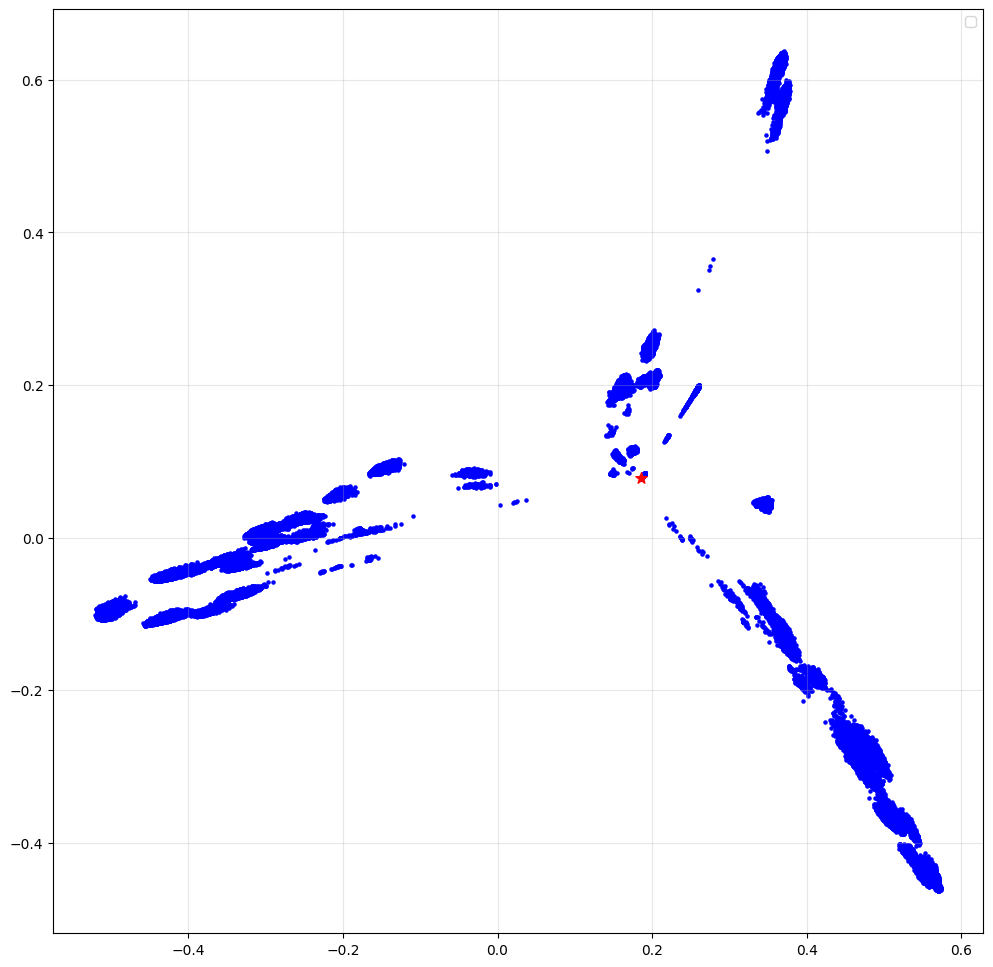

In [54]:
plt.figure(figsize=(12, 12))
plt.scatter(matriz_transformed[:, 0], matriz_transformed[:, 1], s=5, c='b')
plt.scatter(arr_transformed[:, 0], arr_transformed[:, 1], s=70, c='r', marker='*')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# UMAP

In [58]:
umap    = UMAP(n_neighbors=32)
emb     = umap.fit_transform(matriz)
emb_arr = umap.transform(arr.reshape(1, -1))

[I] [15:28:48.452402] Transform can only be run with brute force. Using brute force.


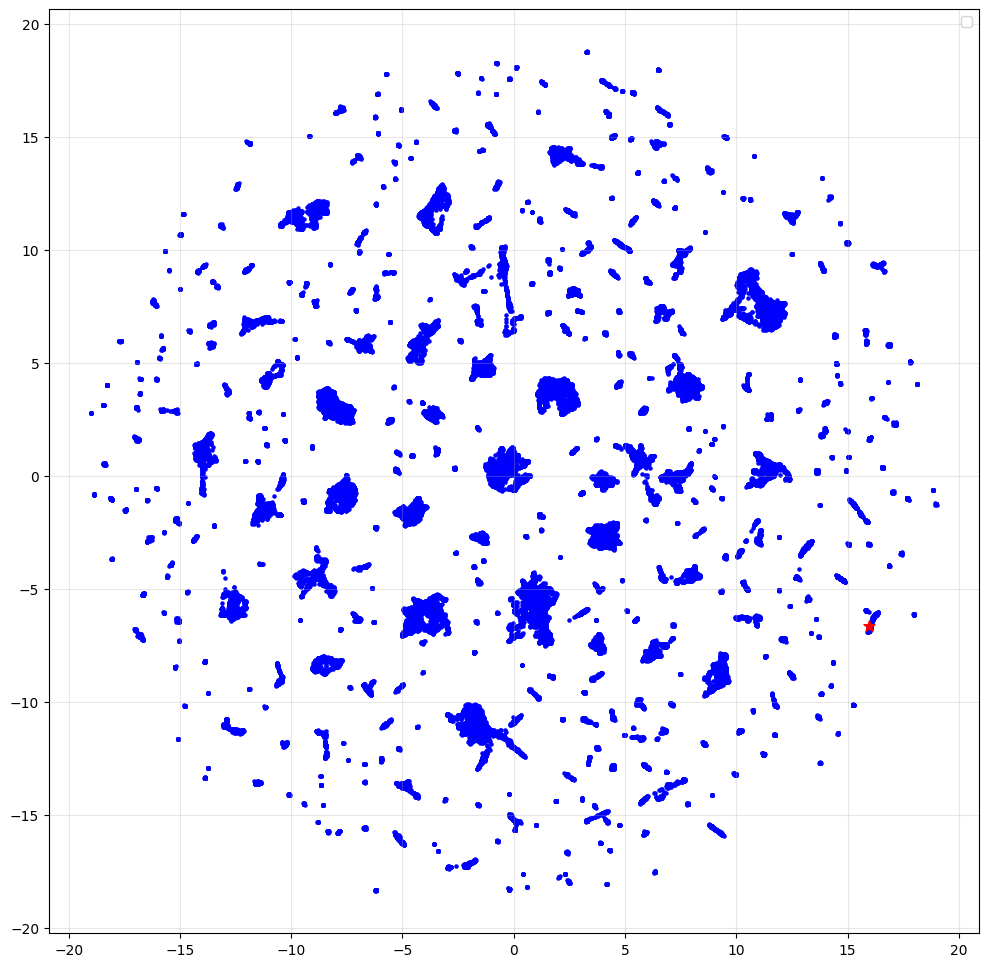

In [59]:
plt.figure(figsize=(12, 12))
plt.scatter(emb[:, 0], emb[:, 1], s=5, c='b')
plt.scatter(emb_arr[:, 0], emb_arr[:, 1], s=70, c='r', marker='*')
plt.legend()
plt.grid(alpha=0.3)
plt.show()